First plot the initial droplet from the original profile to get a sense of the spatial dimension

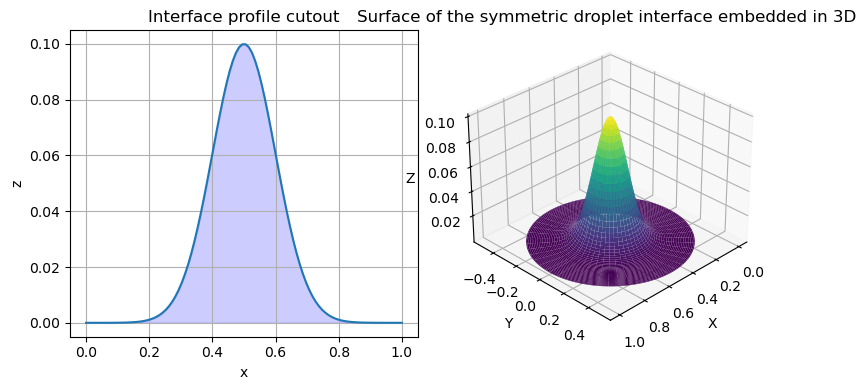

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given parameters
L = 1.0      # Domain length
A = 0.1      # Amplitude of perturbation
k = 50.0 / L**2  # Width of Gaussian perturbation

# Define the droplet profile (2D curve) in the x-z plane
def droplet_profile(x):
    return A * np.exp(-k * (x- L/2)**2) #np.sqrt(0.25 - (x - 0.5)**2)

# Generate x values for the 2D cutout curve
x_vals = np.linspace(0, 1, 100)
z_vals = droplet_profile(x_vals)

# Plot the 2D curve
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(x_vals, z_vals, label='Droplet interface profile')
plt.fill_between(x_vals, z_vals, 0, alpha=0.2, color='blue')
plt.title("Interface profile cutout")
plt.xlabel("x")
plt.ylabel("z")
plt.grid(True)
#plt.legend()

# Create the 3D plot for the surface of revolution
theta = np.linspace(0, 2 * np.pi, 100)  # Angle for revolution
u_vals = np.linspace(0, 0.5, 100)       # x coordinate in half-circle

# Meshgrid for parameter u (which corresponds to the radius in cylindrical coordinates) and theta
U, Theta = np.meshgrid(u_vals, theta)

# Parametric equations for the surface
X = 0.5 + U * np.cos(Theta)  # x = 0.5 + u * cos(theta)
Y = U * np.sin(Theta)         # y = u * sin(theta)
#Z = np.sqrt(0.25 - U**2)      # z = sqrt(0.25 - u^2)
Z = A * np.exp(-k * U**2) 

# Plot the 3D surface
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_title("Surface of the symmetric droplet interface embedded in 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(30, 45)  # Adjust the view angle for better perspective

plt.tight_layout()
plt.show()


#### INSIGHT: At this point it should already be noted that this problem will become MUCH simpler by shifting the coordinates $x-0.5$ to rotate around z-axis at the origin instead. We will do so in the code below.

Next we have to compute the surface tension forces on this droplet to answer the first question.

Time spent: 6 min (LLM generated code)


### 1. The initial force acting on the interface at every point using any numerical or analytical method.


For an inviscid fluid (assumed in the problem statement), we can remove the viscosity term from the Navier-Stokes equation:

$$
\rho\left(\frac{\partial \mathbf{u}}{\partial t}+\mathbf{u} \cdot \nabla \mathbf{u}\right)=-\nabla p+\mathbf{F_s}
$$

When integrating over a finite volume the LHS reduces to the force acting on the local surface according to Newton's law $\mathbf{F_s}= m \mathbf{a}$

The pressure drop across the interface is given by the Young-Laplace equation:

\begin{aligned}
\Delta p & =-\gamma \nabla \cdot \hat{n} \\
& =-2 \gamma H
\end{aligned}


The force acting on the interface at every point can be expressed as the product of the pressure difference and the area:

$$
\mathbf{F_s}=\Delta p \cdot \mathbf{A}=\frac{2 \sigma}{R} \cdot \mathbf{A}
$$

Nothing that everything on the RHS is a constant it is clear that we only need to find the curvature $H$ and can then find the force acting on any patch of a local surface with area $A$ from the Young-Laplace pressure. The surface tension of water at standard temperature and pressure (STP) conditions is [$\gamma = 0.0728$ N/m](https://www.engineeringtoolbox.com/surface-tension-d_962.html).


#### Analytical derivation of H

We compute the mean normal curvature from

$$
H=\frac{1}{2}\left(\kappa_1+\kappa_2\right)
$$

where $\kappa_1$ is the curvature of the profile curve and $\kappa_2$ is the curvature due to revolution (from the Euler definition of curvatures). For a curve $z=f(x)$, the curvature is given by:

#### Derivation of $\kappa_1$
$$
\kappa_1=\frac{f^{\prime \prime}(x)}{\left(1+f^{\prime}(x)^2\right)^{3 / 2}}
$$

where $f(x)=A e^{-k(x-L / 2)^2}$.

For a curve $z=f(x)$, the curvature is:

$$
\kappa_1=\frac{f^{\prime \prime}(x)}{\left(1+f^{\prime}(x)^2\right)^{3 / 2}}
$$


Using the chain rule of differentiation:

$$
\begin{gathered}
f^{\prime}(x)=-2 k(x-0.5) A e^{-k(x-0.5)^2} \\
f^{\prime \prime}(x)=\left(4 k^2(x-0.5)^2-2 k\right) A e^{-k(x-0.5)^2}
\end{gathered}
$$

Providing:

$$
\kappa_1=\frac{\left(4 k^2(x-0.5)^2-2 k\right) A e^{-k(x-0.5)^2}}{\left(1+\left(-2 k(x-0.5) A e^{-k(x-0.5)^2}\right)^2\right)^{3 / 2}}
$$


#### Derivation of $\kappa_2$
For a surface of revolution around the $x$-axis ($\kappa_2$), the the profile curve is given by:

$$
z=f(x)=A e^{-k(x-L / 2)^2}
$$

Since we rotate around the vertical axis $x=0.5$, the correct parametric equations for the surface in cylindrical coordinates $(r, \theta, z)$ are:

$$
\begin{gathered}
X=0.5+(x-0.5) \cos \theta \\
Y=(x-0.5) \sin \theta \\
Z=f(x)
\end{gathered}
$$

where:
- $x$ is the radial coordinate $r=|x-0.5|$,
- $\theta$ is the azimuthal angle from 0 to $2 \pi$,
- $Z=f(x)$ defines the height function.

For a surface of revolution around $x=0.5$, the second principal curvature is (derived from the maximum curvature along the rotational direction):

$$
\kappa_2=\frac{\sin \theta}{r}=\frac{1}{|x-0.5|} \frac{f^{\prime}(x)}{\sqrt{1+f^{\prime}(x)^2}}
$$

which simplifies to:

$$
\kappa_2=\frac{f^{\prime}(x)}{|x-0.5| \sqrt{1+f^{\prime}(x)^2}}
$$


Final Mean Curvature Expression $H(x)$

$$
H(x)=\frac{1}{2}\left(\frac{f^{\prime \prime}(x)}{\left(1+f^{\prime}(x)^2\right)^{3 / 2}}+\frac{1}{r(x) \sqrt{1+f^{\prime}(x)^2}}\right) .
$$

where:
- $f(x)=A e^{-k(x-0.5)^2}$,
- $f^{\prime}(x)=-2 k(x-0.5) f(x)$,
- $f^{\prime \prime}(x)=\left(4 k^2(x-0.5)^2-2 k\right) f(x)$,
- $r(x)=|x-0.5|$.


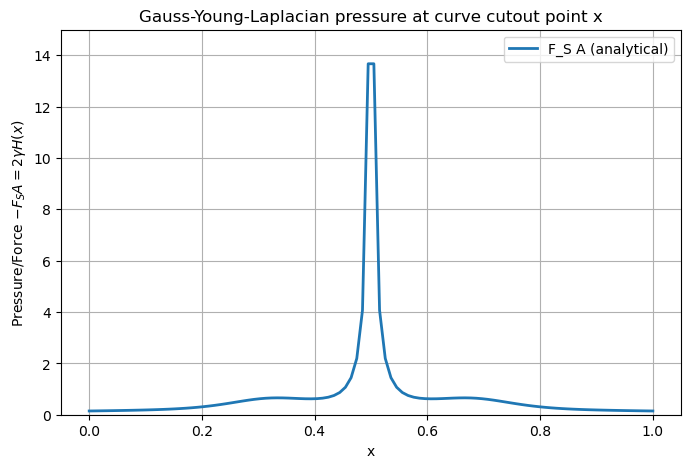

In [52]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.0728  # N/m

def rotated_profile(x, theta, A=0.1, k=50.0, L=1.0):
    """ Compute the profile function rotated around the z-axis at (x, theta). """
    r = np.abs(x - 0.5)  # Radial distance from rotation axis
    return A * np.exp(-k * r**2)

def mean_curvature_H(x, A=0.1, k=50.0, L=1.0):
    """
    Compute the mean normal curvature H(x) at a point x for the given surface of revolution
    around x = 0.5 (rotating around the z-axis).
    """
    r = np.abs(x - 0.5)
    f_x = rotated_profile(x, 0, A, k, L)  # Profile at theta = 0
    
    # First and second derivatives
    f_prime_x = -2 * k * r * f_x * np.sign(x - 0.5)
    f_double_prime_x = (4 * k**2 * r**2 - 2 * k) * f_x
    
    # Compute principal curvatures
    kappa_1 = f_double_prime_x / (1 + f_prime_x**2)**(3/2)
    kappa_2 = 1 / (r * np.sqrt(1 + f_prime_x**2)) if r != 0 else 0  # Maximum curvature along rotation
    
    # Mean curvature
    H = 0.5 * (kappa_1 + kappa_2)
    return H

# Compute the analytical solution
x_vals = np.linspace(0.0, 1, 100)  # Avoid division by zero at x=0.5
H_vals = np.array([mean_curvature_H(x) for x in x_vals])

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals,  2 * gamma * H_vals, label='F_S A (analytical)', linewidth=2)
plt.ylim([0, 15])
plt.xlabel("x")
plt.ylabel("Pressure/Force $- F_S A =  2 \gamma H(x)$")
plt.legend()
plt.grid(True)
plt.title("Gauss-Young-Laplacian pressure at curve cutout point x")
plt.show()


Time spent (mixture of manual coding and LLM routines): 10:52 min 

### 2. Compare the numerical solutions for at least two or more different discretisation methods using N=10, 100 and 1000 sampling points of the interface.

We will use forward difference (FD) and centre difference (CD) for the comparisons.




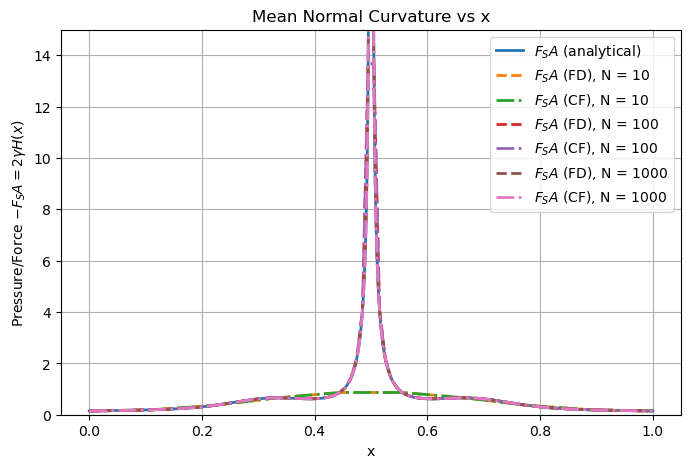

In [56]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.0728  # N/m

def rotated_profile(x, theta, A=0.1, k=50.0, L=1.0):
    """ Compute the profile function rotated around the z-axis at (x, theta). """
    r = np.abs(x - 0.5)  # Radial distance from rotation axis
    return A * np.exp(-k * r**2)

def mean_curvature_H(x, A=0.1, k=50.0, L=1.0):
    """
    Compute the mean normal curvature H(x) at a point x for the given surface of revolution
    around x = 0.5 (rotating around the z-axis).
    """
    r = np.abs(x - 0.5)
    f_x = rotated_profile(x, 0, A, k, L)  # Profile at theta = 0
    
    # First and second derivatives
    f_prime_x = -2 * k * r * f_x * np.sign(x - 0.5)
    f_double_prime_x = (4 * k**2 * r**2 - 2 * k) * f_x
    
    # Compute principal curvatures
    kappa_1 = f_double_prime_x / (1 + f_prime_x**2)**(3/2)
    kappa_2 = 1 / (r * np.sqrt(1 + f_prime_x**2)) if r != 0 else 0  # Maximum curvature along rotation
    
    # Mean curvature
    H = 0.5 * (kappa_1 + kappa_2)
    return H

# Numerical differentiation routines
def mean_curvature_H_fd(x, A=0.1, k=50.0, L=1.0, h=1e-5):
    """ Compute mean curvature using forward difference """
    r = np.abs(x - 0.5)
    f_x = rotated_profile(x, 0, A, k, L)
    f_x_h = rotated_profile(x + h, 0, A, k, L)
    
    f_prime_x = (f_x_h - f_x) / h
    f_double_prime_x = (rotated_profile(x + 2*h, 0, A, k, L) - 2 * f_x_h + f_x) / h**2
    
    kappa_1 = f_double_prime_x / (1 + f_prime_x**2)**(3/2)
    kappa_2 = 1 / (r * np.sqrt(1 + f_prime_x**2)) if r != 0 else 0
    
    return 0.5 * (kappa_1 + kappa_2)

def mean_curvature_H_cd(x, A=0.1, k=50.0, L=1.0, h=1e-5):
    """ Compute mean curvature using central difference """
    r = np.abs(x - 0.5)
    f_x_h = rotated_profile(x + h, 0, A, k, L)
    f_x_mh = rotated_profile(x - h, 0, A, k, L)
    
    f_prime_x = (f_x_h - f_x_mh) / (2*h)
    f_double_prime_x = (f_x_h - 2 * rotated_profile(x, 0, A, k, L) + f_x_mh) / h**2
    
    kappa_1 = f_double_prime_x / (1 + f_prime_x**2)**(3/2)
    kappa_2 = 1 / (r * np.sqrt(1 + f_prime_x**2)) if r != 0 else 0
    
    return 0.5 * (kappa_1 + kappa_2)


# Compute the analytical solution
x_vals = np.linspace(0.0, 1, 1000)  # Avoid division by zero at x=0.5
H_vals = np.array([mean_curvature_H(x) for x in x_vals])

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals,  2 * gamma * H_vals, label='$F_S A$ (analytical)', linewidth=2)
plt.ylim([0, 15])
plt.xlabel("x")
plt.ylabel("Pressure/Force $- F_S A =  2 \gamma H(x)$")


# Compute the numerical solutions

for N in [10, 100, 1000]:
    x_vals = np.linspace(0.0, 1, N)  # Avoid division by zero at x=0.5
    
    H_fd = np.array([mean_curvature_H_fd(x) for x in x_vals])
    H_cd = np.array([mean_curvature_H_cd(x) for x in x_vals])
    # Plot
    plt.plot(x_vals,  2 * gamma * H_fd, '--', label=f'$F_S A$ (FD), N = {N}', linewidth=2)
    plt.plot(x_vals,  2 * gamma * H_cd, '-.', label=f'$F_S A$ (CF), N = {N}', linewidth=2)
    
plt.legend()
plt.grid(True)
plt.title("Mean Normal Curvature vs x")
plt.show()



Time spent: 10:52 min + 06:19 min = 17:15 min total

### 3. Derive recommendations for which method you would use in a full dynamic simulation over several timesteps (comments only, do not actually conduct the simulation).

For this we will compare the error relative to the analytical solution for all discretisations.

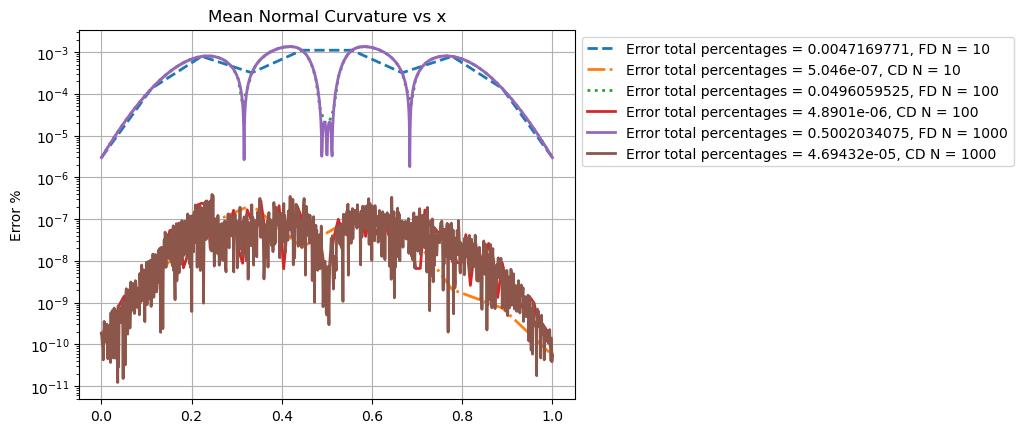

In [88]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.0728  # N/m

def rotated_profile(x, theta, A=0.1, k=50.0, L=1.0):
    """ Compute the profile function rotated around the z-axis at (x, theta). """
    r = np.abs(x - 0.5)  # Radial distance from rotation axis
    return A * np.exp(-k * r**2)

def mean_curvature_H(x, A=0.1, k=50.0, L=1.0):
    """
    Compute the mean normal curvature H(x) at a point x for the given surface of revolution
    around x = 0.5 (rotating around the z-axis).
    """
    r = np.abs(x - 0.5)
    f_x = rotated_profile(x, 0, A, k, L)  # Profile at theta = 0
    
    # First and second derivatives
    f_prime_x = -2 * k * r * f_x * np.sign(x - 0.5)
    f_double_prime_x = (4 * k**2 * r**2 - 2 * k) * f_x
    
    # Compute principal curvatures
    kappa_1 = f_double_prime_x / (1 + f_prime_x**2)**(3/2)
    kappa_2 = 1 / (r * np.sqrt(1 + f_prime_x**2)) if r != 0 else 0  # Maximum curvature along rotation
    
    # Mean curvature
    H = 0.5 * (kappa_1 + kappa_2)
    return H

# Numerical differentiation routines
def mean_curvature_H_fd(x, A=0.1, k=50.0, L=1.0, h=1e-5):
    """ Compute mean curvature using forward difference """
    r = np.abs(x - 0.5)
    f_x = rotated_profile(x, 0, A, k, L)
    f_x_h = rotated_profile(x + h, 0, A, k, L)
    
    f_prime_x = (f_x_h - f_x) / h
    f_double_prime_x = (rotated_profile(x + 2*h, 0, A, k, L) - 2 * f_x_h + f_x) / h**2
    
    kappa_1 = f_double_prime_x / (1 + f_prime_x**2)**(3/2)
    kappa_2 = 1 / (r * np.sqrt(1 + f_prime_x**2)) if r != 0 else 0
    
    return 0.5 * (kappa_1 + kappa_2)

def mean_curvature_H_cd(x, A=0.1, k=50.0, L=1.0, h=1e-5):
    """ Compute mean curvature using central difference """
    r = np.abs(x - 0.5)
    f_x_h = rotated_profile(x + h, 0, A, k, L)
    f_x_mh = rotated_profile(x - h, 0, A, k, L)
    
    f_prime_x = (f_x_h - f_x_mh) / (2*h)
    f_double_prime_x = (f_x_h - 2 * rotated_profile(x, 0, A, k, L) + f_x_mh) / h**2
    
    kappa_1 = f_double_prime_x / (1 + f_prime_x**2)**(3/2)
    kappa_2 = 1 / (r * np.sqrt(1 + f_prime_x**2)) if r != 0 else 0
    
    return 0.5 * (kappa_1 + kappa_2)


# Compute the analytical solution
x_vals = np.linspace(0.0, 1, 1000)  # Avoid division by zero at x=0.5
H_vals = np.array([mean_curvature_H(x) for x in x_vals])

# Plot
line_styles = ['--', '-.', ':', 'x-', 'o-','^-']
# Compute the numerical solutions
for idx, N in enumerate([10, 100, 1000]):
    x_vals = np.linspace(0.0, 1, N)  # Avoid division by zero at x=0.5
    
    H_anal = np.array([mean_curvature_H(x) for x in x_vals])
    H_fd = np.array([mean_curvature_H_fd(x) for x in x_vals])
    H_cd = np.array([mean_curvature_H_cd(x) for x in x_vals])
    # Plot
    err = round(np.sum(100 * 2 * gamma * np.abs(H_fd - H_anal)/H_anal), 10)
    plt.plot(x_vals,  100 * 2 * gamma * np.abs(H_fd - H_anal)/H_anal, line_styles[idx * 2], 
             markersize=0.1, label=f'Error total percentages = {err}, FD N = {N}', linewidth=2)
    err2 = round(np.sum(100 * 2 * gamma * np.abs(H_cd - H_anal)/H_anal), 10)
    plt.plot(x_vals,  100 * 2 * gamma * np.abs(H_cd - H_anal)/H_anal, line_styles[idx * 2 + 1],
             markersize=0.1, label=f'Error total percentages = {err2}, CD N = {N}', linewidth=2)
    
# Move legend outside the plot to the right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add some padding to the right of the plot
#plt.tight_layout()

plt.grid(True)
plt.yscale('log')
plt.ylabel("Error %")
plt.title("Mean Normal Curvature vs x")
plt.show()



#### Insight/Answer: Therefore for this problem the central difference method is superior for all discretisation sizes. 
#### The curvature error is the highest in the domain where the analytical curvature gradient is high. Over time this domain might change so dynamic mesh refinement might be needed.
#### A very interesting insight is that the error for CD $N = 10$ is actually lower than the error for the higher discretisations. Why is that true?

Time spent: Time spent: 10:52 min + 06:19 min + 02:48 min = 20:01 min total.

Time spent (including cleaning code, change to semi log plot etc.): 10:52 min + 06:19 min + 02:48 min + 9:52 min = 27:06 min total


Time spent (including cleaning code, change to semi log plot etc.): Time spent: 10:52 min + 06:19 min + 02:48 min + 9:52 min = 27:06 min total